<a href="https://colab.research.google.com/github/cluglucas/E-commerce-analysis/blob/main/E_commerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
df=pd.read_csv('https://raw.githubusercontent.com/cluglucas/E-commerce-analysis/main/Train.csv')

## Dicionário de variáveis

**ID** <br>
-ID Number of Customers.

**Warehouse_block** <br>
-The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

**Mode_of_Shipment** <br>
-The Company Ships the products in multiple way such as Ship, Flight and Road.

**Customer_care_calls** <br>
-The number of calls made from enquiry for enquiry of the shipment.

**Customer_rating** <br>
-The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)

**Cost_of_the_Product** <br>
-Cost of the Product in US Dollars.

**Prior_purchases** <br>
-The Number of Prior Purchase.

**Product_importance** <br>
-The company has categorized the product in the various parameter such as low, medium, high.

**Gender** <br>
-Male and Female.

**Discount_offered** <br>
-Discount offered on that specific product.

**Weight_in_gms** <br>
-It is the weight in grams.

**Reached.on.Time_Y.N** <br>
-It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.




## Análise preliminar

In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
print(df.shape)

(10999, 12)


In [6]:
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [7]:
df.info() # Não há valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.describe(include=np.number)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df.describe(include=np.object)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Podemos ver com uma primeira análise que:

1- Cerca de 68% do envio é feito por barcos, o restante é feito por aviões e estradas.

2- Cerca de 48% dos produtos é classificado com importância baixa.

3-O gênero dos consumidores está bem distribuído.

## Análise de correlação entre gêneros e outras variáveis

In [10]:
# Criando dataset que será usado na análise de correlações

number_cols=list(df.select_dtypes('int64').columns)
del(number_cols[0])

In [11]:
for i in number_cols:
  display(df[['Gender',i]].groupby(['Gender']).mean().sort_values(by=i, ascending=False))
  print('\n')

,Customer_care_calls
Gender,
M,4.057389
F,4.051578


,Customer_rating
Gender,
M,2.994499
F,2.986655


,Cost_of_the_Product
Gender,
M,211.154382
F,209.255005


,Prior_purchases
Gender,
F,3.581785
M,3.553172


,Discount_offered
Gender,
F,13.562489
M,13.180785


,Weight_in_gms
Gender,
M,3639.907774
F,3628.222362


,Reached.on.Time_Y.N
Gender,
M,0.599010
F,0.594409


Gêneros por ligação de atendimentos ao cliente, avaliação de consumidores, compras anteriores, e chegada a tempo.

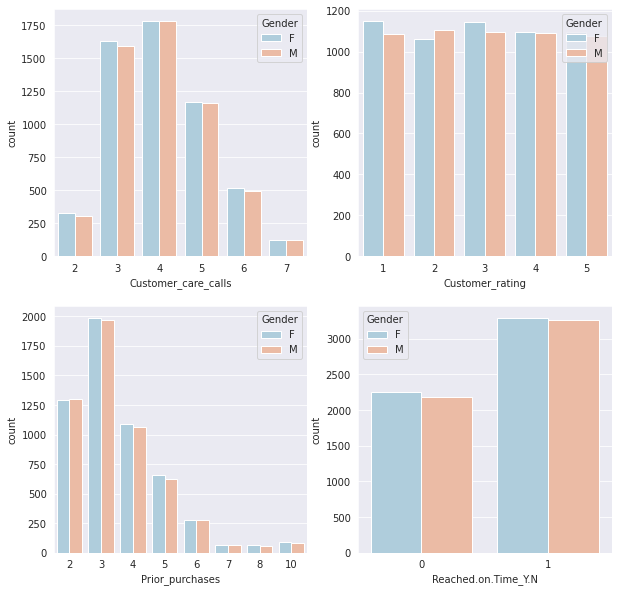

In [12]:
sns.set_style('darkgrid')

f,axes= plt.subplots(2,2, figsize=(10,10))

sns.countplot(x='Customer_care_calls',hue='Gender',data=df,palette='RdBu_r', ax=axes[0,0])
sns.countplot(x='Customer_rating',hue='Gender',data=df,palette='RdBu_r', ax=axes[0,1])
sns.countplot(x='Prior_purchases',hue='Gender',data=df,palette='RdBu_r', ax=axes[1,0])
sns.countplot(x='Reached.on.Time_Y.N',hue='Gender',data=df,palette='RdBu_r', ax=axes[1,1])

sns.set_style('whitegrid')

## Análise por blocos presentes no armazém (A, B, C, D e F)

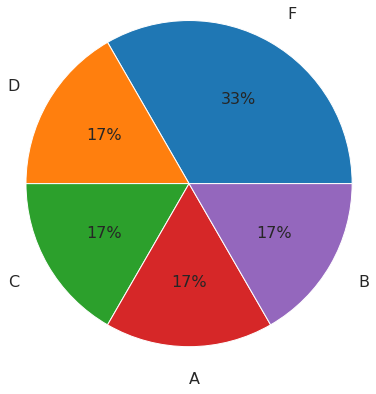

In [13]:
warehouse = df['Warehouse_block'].value_counts()

plt.figure(figsize=(7, 5))

plot = warehouse.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=1.5)
plt.show()

## Análise por modo de envio

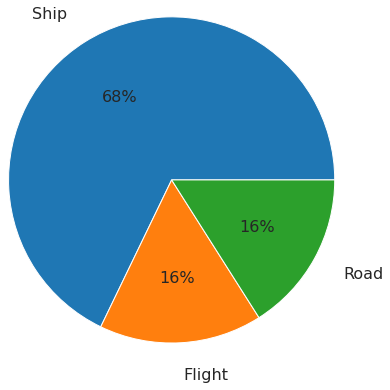

In [14]:
shipping= df['Mode_of_Shipment'].value_counts()

plt.figure(figsize=(7, 5))

plot = shipping.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=1.5)
plt.show()

## Análise do número de liçações de atendimento ao cliente

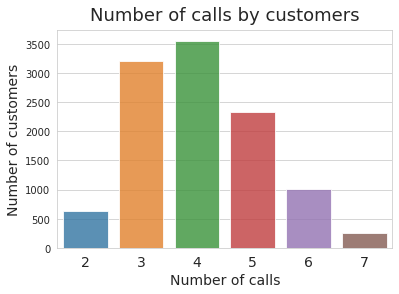

In [15]:
call_rate=df['Customer_care_calls'].value_counts()

sns.barplot(x=call_rate.index, y=call_rate.values, alpha=0.8)
plt.title('Number of calls by customers', fontsize=18, pad=10)
plt.ylabel('Number of customers', fontsize=14)
plt.xlabel('Number of calls', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

## Análise da avaliação de consumidores

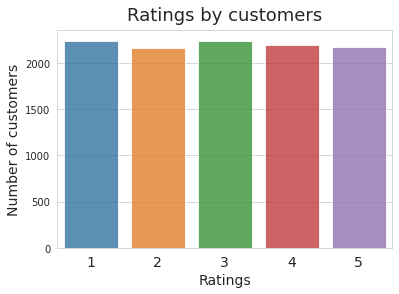

In [16]:
rating=df['Customer_rating'].value_counts()

sns.barplot(x=rating.index, y=rating.values, alpha=0.8)
plt.title('Ratings by customers', fontsize=18, pad=10)
plt.ylabel('Number of customers', fontsize=14)
plt.xlabel('Ratings', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

## Análise de compras anteriores

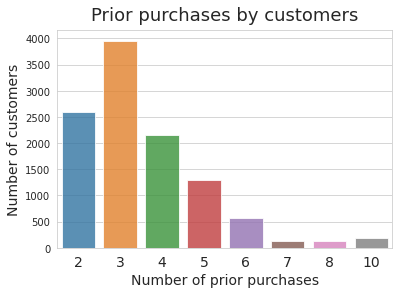

In [17]:
prior_purchases=df['Prior_purchases'].value_counts()

sns.barplot(x=prior_purchases.index, y=prior_purchases.values, alpha=0.8)
plt.title('Prior purchases by customers', fontsize=18, pad=10)
plt.ylabel('Number of customers', fontsize=14)
plt.xlabel('Number of prior purchases', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

## Análise da importância dos produtos

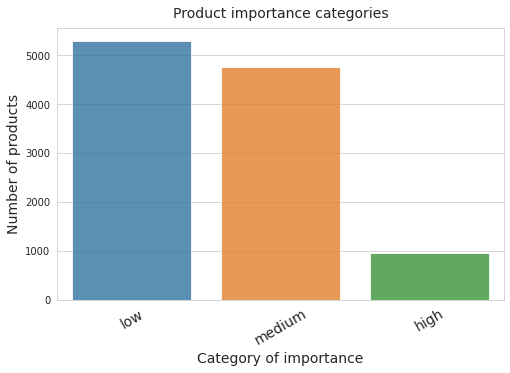

In [18]:
importance = df['Product_importance'].value_counts()

plt.figure(figsize=(8, 5))

sns.barplot(x=importance.index, y=importance.values, alpha=0.8)
plt.title('Product importance categories', fontsize=14, pad=10)
plt.ylabel('Number of products', fontsize=14)
plt.xlabel('Category of importance', fontsize=14)
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=10)
plt.show()

## Análise do custo dos produtos

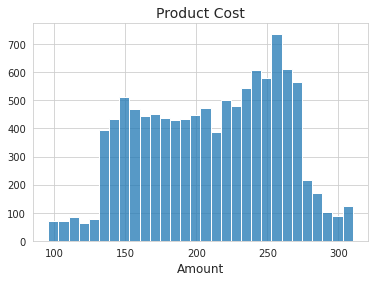

In [19]:
cost= df['Cost_of_the_Product']

sns.histplot(cost).set(ylabel=None, xlabel=None)
plt.title('Product Cost', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.show()

## Análise da correlação entre avaliação dos consumidores e outras variáveis

In [20]:
# selecionando todas as colunas que tem objeto como tipo de dado

object_cols=list(df.select_dtypes('object').columns)

for i in object_cols:
  df[i]=df[i].astype('category')

In [21]:
# Para efetuar a análise, devemos transformar os objetos em números que representam cada categoria

cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [22]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int8 
 2   Mode_of_Shipment     10999 non-null  int8 
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int8 
 8   Gender               10999 non-null  int8 
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
 11  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(8), int8(4)
memory usage: 730.5 KB


In [24]:
# Selecionando features que serão utilizadas na análise

features=list(df.columns)
del(features[0],features[3])

In [25]:
# calculo de correlação entre as features e avaliação dos clientes

for f in features:
    related = df['Customer_rating'].corr(df[f])
    print("%s: %f" % (f,related))

Warehouse_block: 0.010169
Mode_of_Shipment: 0.001679
Customer_care_calls: 0.012209
Cost_of_the_Product: 0.009270
Prior_purchases: 0.013179
Product_importance: 0.003157
Gender: 0.002775
Discount_offered: -0.003124
Weight_in_gms: -0.001897
Reached.on.Time_Y.N: 0.013119


In [26]:
correlations = [df['Customer_rating'].corr(df[f]) for f in features ]

In [27]:
features_df = pd.DataFrame({'attributes': features, 'correlation': correlations})
display(features_df)

,attributes,correlation
0,Warehouse_block,0.010169
1,Mode_of_Shipment,0.001679
2,Customer_care_calls,0.012209
3,Cost_of_the_Product,0.009270
4,Prior_purchases,0.013179
5,Product_importance,0.003157
6,Gender,0.002775
7,Discount_offered,-0.003124
8,Weight_in_gms,-0.001897
9,Reached.on.Time_Y.N,0.013119


([<matplotlib.axis.XTick at 0x7fb69c092cd0>,
 [Text(0, 0, 'Warehouse_block'),
  Text(0, 0, 'Mode_of_Shipment'),
  Text(0, 0, 'Customer_care_calls'),
  Text(0, 0, 'Cost_of_the_Product'),
  Text(0, 0, 'Prior_purchases'),
  Text(0, 0, 'Product_importance'),
  Text(0, 0, 'Gender'),
  Text(0, 0, 'Discount_offered'),
  Text(0, 0, 'Weight_in_gms'),
  Text(0, 0, 'Reached.on.Time_Y.N')])

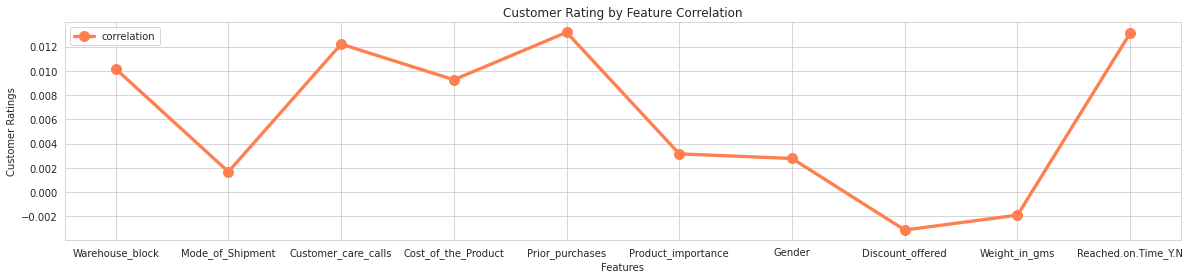

In [31]:
fig=features_df.plot(x ='attributes', y='correlation', kind = 'line',
                    color='coral', figsize=(20,4), title='Customer Rating by Feature Correlation',
                    linewidth=3.3, marker='.', markersize=20)                

plt.xlabel('Features')
plt.ylabel('Customer Ratings')
plt.xticks(ticks = features_df.index, labels = features_df['attributes'])